# Image Data Augmentation with Keras

![Horizontal Flip](assets/horizontal_flip.jpg)

# Task 1: Import Libraries

In [1]:
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

from PIL import Image
from matplotlib import pyplot as plt

print('Using TensorFlow', tf.__version__)

Using TensorFlow 2.1.0


# Task 2: Rotation

In [2]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    rotation_range=40
)

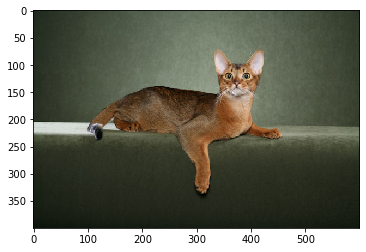

In [3]:
image_path = 'images/train/cat/cat.jpg'

plt.imshow(plt.imread(image_path));

Found 1 images belonging to 1 classes.


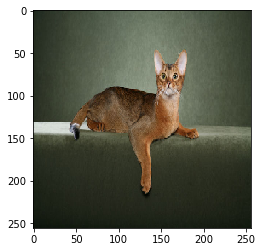

In [13]:
x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 3: Width and Height Shifts

In [19]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    width_shift_range=[-100, -50, 0, 50, 100],
    height_shift_range=[-50, 0, 50]
)

Found 1 images belonging to 1 classes.


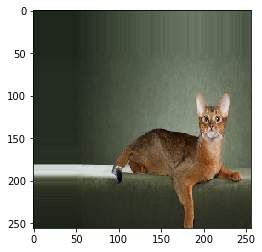

In [21]:
x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 4: Brightness

Found 1 images belonging to 1 classes.


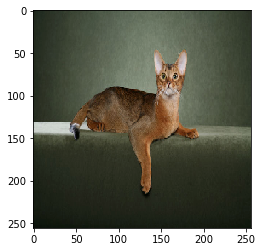

In [24]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    brightness_range=(0.5, 2,)
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 5: Shear Transformation

Found 1 images belonging to 1 classes.


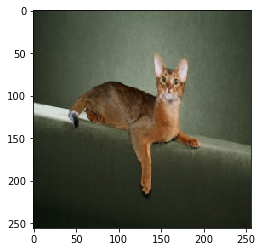

In [25]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    shear_range=40
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 6: Zoom

Found 1 images belonging to 1 classes.


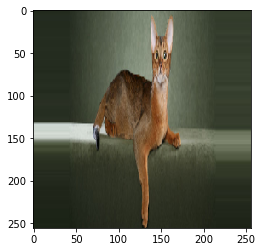

In [29]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    zoom_range=0.5
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 7: Channel Shift

Found 1 images belonging to 1 classes.


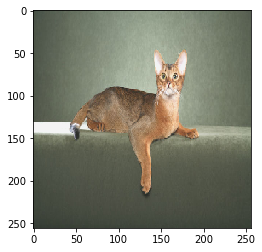

In [31]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    channel_shift_range=100 #-100 to 100
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

In [33]:
x.mean()

109.98739

In [34]:
np.array(Image.open(image_path)).mean()

69.57810416666666

# Task 8: Flips

Found 1 images belonging to 1 classes.


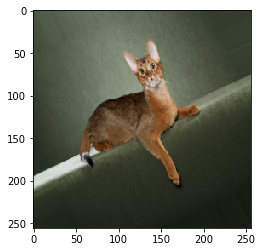

In [47]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    horizontal_flip = True,
    vertical_flip = True,
    rotation_range=30
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 9: Normalization

### Featurewise

In [48]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    featurewise_center=True,
    featurewise_std_normalization=True
)

generator.fit(x_train)

In [50]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)
print(x_train.mean())

-0.5423785 0.65102136 [[4]]
120.70756512369792


### Samplewise

In [51]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    samplewise_center=True,
    samplewise_std_normalization=True
)

x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)

7.4505806e-08 0.9999999 [[4]]


# Task 10: Rescale and Preprocessing Function

In [56]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    rescale=1.,
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [60]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))

In [61]:
print(x.mean(), x.std(), y)

-0.21568371 0.573749 [[7]]


# Task 11: Using in Model Training

In [62]:
# Your code here
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    horizontal_flip=True,
    rotation_range=20
)

In [66]:
# Your code here
model=tf.keras.models.Sequential([
    tf.keras.applications.mobilenet_v2.MobileNetV2(
        include_top=False, input_shape=(32, 32, 3),
        pooling='avg'
    ),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 1280)              2257984   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                12810     
Total params: 2,270,794
Trainable params: 2,236,682
Non-trainable params: 34,112
_________________________________________________________________


In [67]:
history = model.fit(
    generator.flow(x_train, y_train, batch_size=32),
    epochs=1, steps_per_epoch=10
)

  ...
    to  
  ['...']
Train for 10 steps
10/10 [==============================] - 12s 1s/step - loss: 3.3528 - accuracy: 0.1250
